In [1]:
import underworld as uw
import math
from underworld import function as fn
import glucifer
import numpy as np
import os
import math
import collections
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 28 days


This notebook implements various mesh refinement functions for use with Underworld2.

## Example 1: 

$y' = \frac{ln((\alpha y + e) -1)}{ln((\alpha + e) - 1)}$


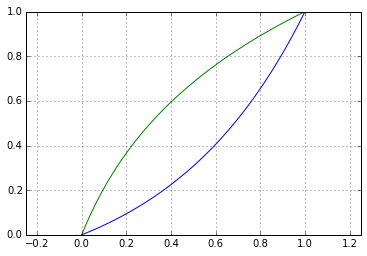

In [2]:
alpha = 11
yorig = np.linspace(0.00,1,100)

y2 = [(math.log(alpha*Y + math.e) - 1.)*(1./(math.log(alpha + math.e) - 1)) for Y in yorig ]
y3 = [(math.e**(Y*(math.log(alpha + math.e) - 1) + 1 ) - math.e)/alpha for Y in yorig ]
pyplot.plot(yorig, y3)
pyplot.plot(yorig, y2)
pyplot.axis('equal')
pyplot.grid()

In [3]:
alpha = 11.
res = 256
dyo = 1./res

dyn = 1. - (math.log(alpha*(1- dyo ) + math.e) - 1.)*(1./(math.log(alpha + math.e) - 1))

print(dyo, dyn, (dyo/dyn))

(0.00390625, 0.001938026862393638, 2.015580937394969)


In [4]:
### print((math.log(alpha*0. + math.e) - 1)*(1/(math.log(alpha + math.e) - 1)), (math.log(alpha*1. + math.e) - 1)*(1/(math.log(alpha + math.e) - 1)))
print((math.e**(0*(math.log(alpha + math.e) - 1) + 1 ) - math.e)/alpha, (math.e**(1.*(math.log(alpha + math.e) - 1) + 1 ) - math.e)/alpha)

#(math.e**(0.*math.log(alpha + math.e)) - math.e)/alpha

(0.0, 0.9999999999999999)


In [5]:
dim = 2

meshX = 256
meshY = 128

In [6]:
# create mesh objects
mesh = uw.mesh.FeMesh_Cartesian( elementType='Q1/dQ0', 
                                         elementRes=(meshX, meshY), 
                                           minCoord=(-1.,0.), 
                                           maxCoord=(1.,1.0))


#THis one for the rectangonal mesh
alpha = 1.
newys = []
newxs = []
for index, coord in enumerate(mesh.data):
    y0 = coord[1]
    x0 = abs(coord[0])
    newy = (math.log(alpha*y0 + math.e) - 1)*(1/(math.log(alpha + math.e) - 1))
    if coord[0] > 0:
        newx = (math.e**(x0*(math.log((alpha/2.) + math.e) - 1) + 1 ) - math.e)/(alpha/2.)     
    else:
        newx = -1.*(math.e**(x0*(math.log((alpha/2.) + math.e) - 1) + 1 ) - math.e)/(alpha/2.)
    newys.append(newy)
    newxs.append(newx)
    #print y0,newy

In [95]:
#THis one for the square mesh

alpha = 11.
newys = []
newxs = []
for index, coord in enumerate(mesh.data):
    y0 = coord[1]
    x0 = abs(coord[0])
    newy = (math.log(alpha*y0 + math.e) - 1)*(1/(math.log(alpha + math.e) - 1))
    newx = (math.log(alpha*x0 + math.e) - 1)*(1/(math.log(alpha + math.e) - 1))
    newys.append(newy)
    newxs.append(newx)

In [96]:
with mesh.deform_mesh():
    mesh.data[:,1] = newys
    mesh.data[:,0] = newxs



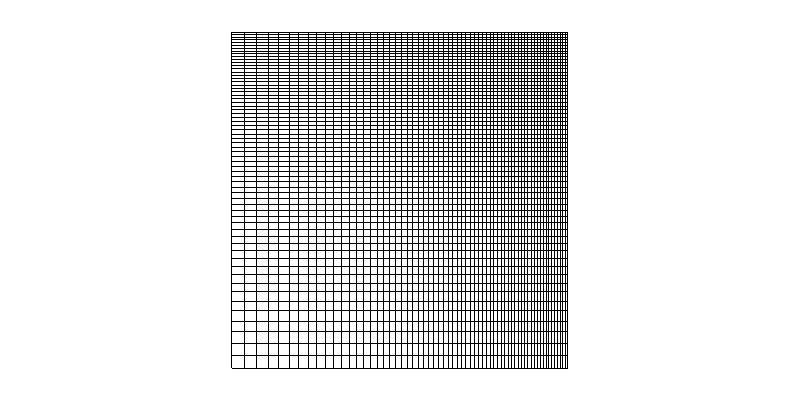

In [97]:

# gLucifer visualisation of mesh
fig = glucifer.Figure( figsize=(800,400) )
fig.append(glucifer.objects.Mesh(mesh ))
fig.save_database('test.gldb')
fig.show()


## Example 2: 

This refinement function is given in the Fenics documentation: http://fenicsproject.org/documentation/tutorial/prepro.html

$y' = a + (b-a)(\frac{y-a}{b-a})^s$

Here I'm using the similar expression:

$y' = 1. - \left( a + (b-a)(\frac{y-a}{b-a})^s \right)$

(0.0, 1.0, 0.0, 1.0)

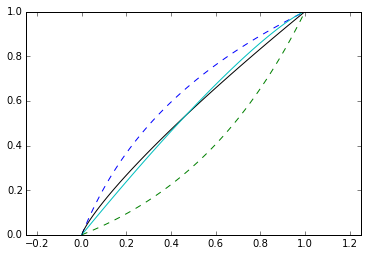

In [98]:
s = 1.22
a = 0.00
b = 1.
yorig = np.linspace(a,b,100)

yp0 = [a + (b-a)*((Y - a)/(b-a))**(1./s) for Y in yorig ]
yp1 = [1. - (a + (b-a)*((1 - Y)/(b-a))**s) for Y in yorig ]


pyplot.plot(yorig, y2, linestyle='--')
pyplot.plot(yorig, y3, linestyle='--')


pyplot.plot(yorig, yp0, c= 'k')
pyplot.plot(yorig, yp1)
#pyplot.grid()
pyplot.axis('equal')


In [99]:
max(yp1)

1.0

In [100]:
mesh.reset()

In [101]:
#THis one for the square mesh
s = 1.26
a = 0.00
b = 1.

newys = []
newxs = []
for index, coord in enumerate(mesh.data):
    y0 = coord[1]
    x0 = abs(coord[0])
    newy =(1. - (a + (b-a)*((1 - y0)/(b-a))**s))
    newx =(1. - (a + (b-a)*((1 - x0)/(b-a))**s)) 
    newys.append(newy)
    newxs.append(newx)

In [102]:
with mesh.deform_mesh():
    mesh.data[:,1] = newys
    mesh.data[:,0] = newxs


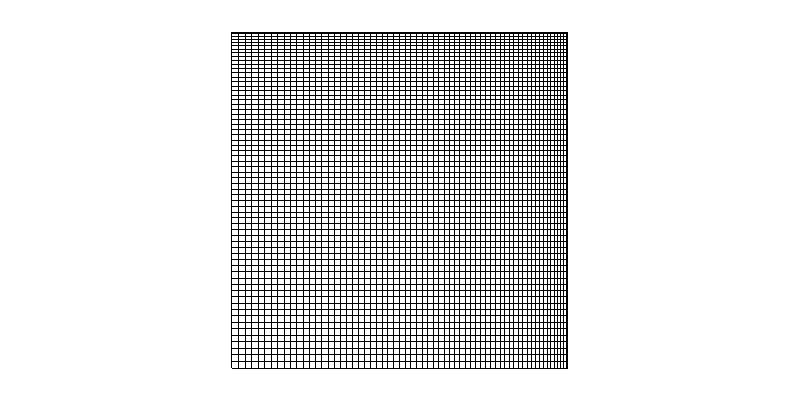

In [103]:
# gLucifer visualisation of mesh
fig = glucifer.Figure( figsize=(800,400) )
fig.append(glucifer.objects.Mesh( mesh))
fig.save_database('test.gldb')
fig.show()
#

In [104]:
s

1.26

In [105]:

s = 1.22 
res = 64.
dy = 1/res
dyp =(1. - (a + (b-a)*((1 - (1 - dy)/(b-a))**s)))
#print(dyp)
print((dy)/(1-dyp))

2.4966610978


In [106]:
for i in np.arange(1,1.3,0.02):
    dyp =(1. - (a + (b-a)*((1 - (1 - dy)/(b-a))**i)))
    #print(dyp)
    print("s is: " + str(i) + " del y is: " + str((dy)/(1-dyp)))

s is: 1.0 del y is: 1.0
s is: 1.02 del y is: 1.08673486253
s is: 1.04 del y is: 1.18099266143
s is: 1.06 del y is: 1.28342589756
s is: 1.08 del y is: 1.39474366635
s is: 1.1 del y is: 1.51571656651
s is: 1.12 del y is: 1.64718203454
s is: 1.14 del y is: 1.79005014186
s is: 1.16 del y is: 1.94530989482
s is: 1.18 del y is: 2.11403608112
s is: 1.2 del y is: 2.29739670999
s is: 1.22 del y is: 2.4966610978
s is: 1.24 del y is: 2.7132086549
s is: 1.26 del y is: 2.94853843458
s is: 1.28 del y is: 3.20427951036
s is: 1.3 del y is: 3.48220225318


## circular refinement

In [107]:
mesh.reset()


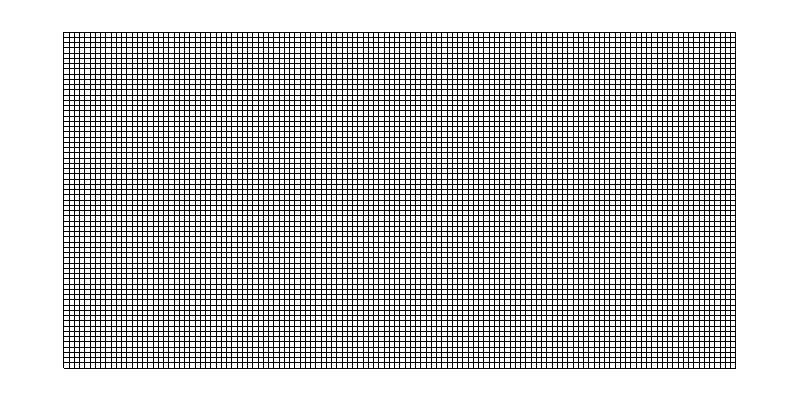

In [108]:
# gLucifer visualisation of mesh
fig = glucifer.Figure( figsize=(800,400) )
fig.append(glucifer.objects.Mesh(mesh))
fig.show()


In [109]:
def circ_attractor(mesh, a=0., b=1., s=1.3, radius = 0.3, origin = [0.,1.],target = 0.5, vcutoff=None, hcutoff= None):
    #Get mesh info
    dx = (mesh.maxCoord[0] - mesh.minCoord[0])/mesh.elementRes[0]
    #Initialise vector for the attractor
    r0 = np.array(origin)
    newmeshdata = np.copy(mesh.data)
    for index, coord in enumerate(mesh.data):
        n0 = np.array(coord) #get node position vector
        d0 = r0 - n0 #get vector between points  
        dl = np.linalg.norm(d0)
        #print(d0)
        #Get unit vector for the displacement
        if not dl == NaN:
            du = d0/dl       
        #Calc new mesh positions:
        if (dl > (dx/2.)) and (dl < radius):
            #Get weight
            normpos = 1. - (dl/radius)
            #print normpos
            d1 = (1. - (a + (b-a)*((1 - normpos)/(b-a))**s))
            w0 = d1 - normpos
            #print w0
            #print(normpos, d1, w0)
            newmeshdata[index] = newmeshdata[index] + ((du/2.)*w0)
    return newmeshdata
#print(normpos, d1, w0)        

In [110]:
newcoords = circ_attractor(mesh, origin = [0.51,0.51], target = 2)

In [111]:
test = np.array([ nan,  nan])


In [112]:
with mesh.deform_mesh():
    mesh.data[:] = newcoords    


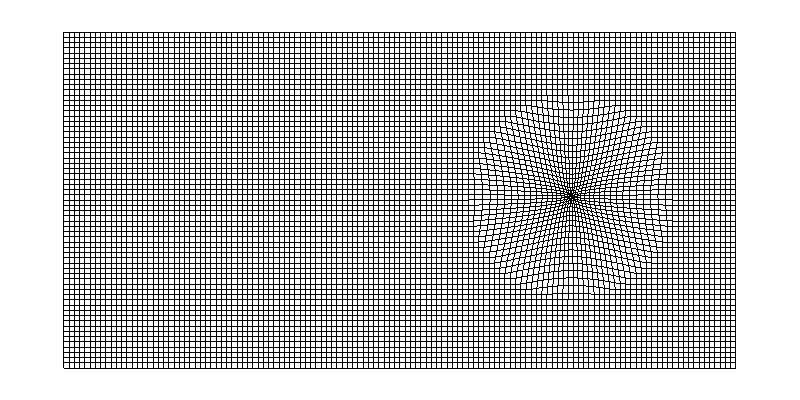

In [113]:
# gLucifer visualisation of mesh
fig = glucifer.Figure( figsize=(800,400) )
fig.append(glucifer.objects.Mesh(mesh))

fig.save_database('test.gldb')
fig.show()

## Cosine taper

In [114]:
mesh.reset()

begin_taper = 0.8
maxY = 1.

#THis one for the square mesh
s = 1.4
a = 0.00
b = 1.

newys = []
newxs = []
for index, coord in enumerate(mesh.data):
    y0 = coord[1]
    x0 = abs(coord[0])
    yp1 = 1. - (a + (b-a)*((1 - y0)/(b-a))**s)
    
    if y0 < begin_taper:
        newy = yp1
    else:
        lamb = math.pi/(maxY - begin_taper)
        taper = 0.5* ((math.cos(lamb*(y0 - begin_taper))) + 1.)
        dy = (yp1 - y0)
        newy = y0 + dy*taper

    #newy =(1. - (a + (b-a)*((1 - y0)/(b-a))**s))
    #newx =(1. - (a + (b-a)*((1 - x0)/(b-a))**s)) 
    newys.append(newy)
    #newxs.append(newx)

In [115]:
with mesh.deform_mesh():
    mesh.data[:,1] = newys


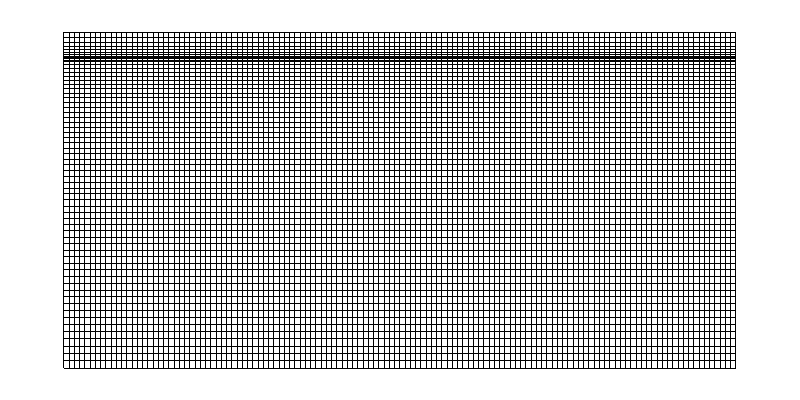

In [116]:
# gLucifer visualisation of mesh
fig = glucifer.Figure( figsize=(800,400) )
fig.append(glucifer.objects.Mesh(mesh))

fig.save_database('test.gldb')
fig.show()

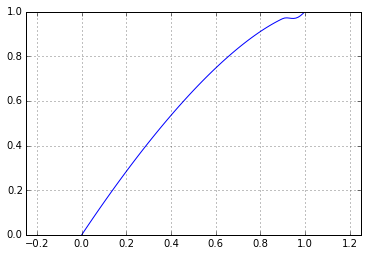

In [117]:
s = 1.5

a = 0.00
b = 1.
yorig = np.linspace(a,b,100)

begin_taper = 0.9

#yp1 = [1. - (a + (b-a)*((1 - Y)/(b-a))**s) for Y in yorig ]
#y2 = [i + amp*(gauss(i-cent,sig)) for i in yp1]

y2 = []    
for y0 in yorig:   
    yp1 = 1. - (a + (b-a)*((1 - y0)/(b-a))**s)
    #print(y0, yp1)
    if y0 < begin_taper:
        newy = yp1
    else:
        lamb = math.pi/(maxY - begin_taper)
        taper = 0.5* ((math.cos(lamb*(y0 - begin_taper))) + 1.)
        dy = (yp1 - y0)
        
        newy = y0 + dy *taper
    y2.append(newy)  

    
#pyplot.plot(yorig, yorig)
pyplot.plot(yorig, y2)
pyplot.axis('equal')
pyplot.grid()  

In [118]:
mesh.elementRes

(128, 64)

## Shishkin Mesh

In [7]:
mesh.reset()

In [9]:
def coarse_fine_division(mesh, axis="y", refine_by=2., relax_by =0.5):
    if axis == "y":
        thisaxis = 1
    else:
        thisaxis = 0
    width = (mesh.maxCoord[thisaxis]-mesh.minCoord[thisaxis])
    dx = (mesh.maxCoord[thisaxis]-mesh.minCoord[thisaxis])/ (mesh.elementRes[thisaxis])
    nx = mesh.elementRes[thisaxis]
    dxf = dx/ refine_by
    dxc = dx/ relax_by
    i = 0
    current_width = ((nx - i)  * dxf) + (i * dxc)
    while current_width < width:
        i += 1
        current_width = ((nx - i)  * dxf) + (i * dxc)
    #print current_width
    #correct dxc so the total domain is preserved.
    dxc = (width  - ((nx - i)  * dxf))/i
    nxf = (nx - i) 
    nxc = i
    nt = (nxf + nxc)
    assert nt == nx
    return nxf, dxf, nxc, dxc

In [10]:
nxf, dxf, nxc, dxc = coarse_fine_division(mesh, axis="x", refine_by=2., relax_by =0.5)

In [11]:
#nxf*dxf 

In [12]:
def shishkin_centre_arrange(mesh, nxf, dxf, nxc, dxc, axis="y",centre = 0.5):
    import itertools
    if axis == "y":
        thisaxis = 1
    else:
        thisaxis = 0
    print thisaxis
    ###################
    #Get the number of coarse elements either side of fine elements
    ###################
    nr = nxc
    nl = 0
    print((nxf*dxf - abs(mesh.minCoord[thisaxis])))
    if ((nxf*dxf - abs(mesh.minCoord[thisaxis])) > centre):
        print("left edge")
        pass
    else:
        left_length = (nl*dxc) + 0.5*(dxf*nxf) - abs(mesh.minCoord[thisaxis])
        while (left_length <  centre):
            nl += 1
            left_length = (nl*dxc) + 0.5*(dxf*nxf) - abs(mesh.minCoord[thisaxis])
            #print(left_length)
            if nl == nxc:
                print("right edge")
                break
        nr = nxc - nl
    print(nl, nr, nxf)
    #assert nr + nl + nxf == mesh.elementRes[thisaxis]
    ###################
    #return dictionary of new element mappings
    ###################
    lcoords = [(mesh.minCoord[thisaxis] + i*dxc) for i in range(nl+1)]
    if lcoords:
        #print(nl, lcoords[-1]/dxc)
        ccoords =  [lcoords[-1] + i*dxf for i in range(1, nxf+1)]
    else:
        ccoords =  [(mesh.minCoord[thisaxis] + i*dxf) for i in range(0, nxf)]
    rcoords = [ccoords[-1] + i*dxc for i in range(1, nr +1)]
    if rcoords:
        #rcoords.append(mesh.maxCoord[0])
        pass
    else:
        #ccoords.append(mesh.maxCoord[0])
        pass
    newcoords = lcoords+ ccoords+ rcoords
    #assert len(newcoords) == nx + 1 
    origcoords = list(np.unique(mesh.data[:,thisaxis]))
    dictionary = dict(itertools.izip(origcoords, newcoords))
    assert len([x for x, y in collections.Counter(newcoords).items() if y > 1]) == 0 #checks agains multiple coordinates
    return dictionary
    


In [13]:
#nxf, dxf, nxc, dxc = coarse_fine_division(mesh, axis="x", refine_by=2., relax_by =0.5)
#d  =shishkin_centre_arrange(mesh,  nxf=nxf, dxf=dxf, nxc=nxc, dxc=dxc,axis="x",centre = 0.)

In [14]:
def shishkin_deform(mesh, centre = 0.5, axis="y", refine_by=2., relax_by =0.5):
    if axis == "y":
        thisaxis = 1
    else:
        thisaxis = 0
    nxf, dxf, nxc, dxc, = coarse_fine_division(mesh,axis, refine_by=refine_by, relax_by =relax_by)
    coorddict = shishkin_centre_arrange(mesh, nxf=nxf, dxf=dxf, nxc=nxc, dxc=dxc, axis=axis , centre=centre)
    with mesh.deform_mesh():
        for index, coord in enumerate(mesh.data):
            key = mesh.data[index][thisaxis]
            mesh.data[index][thisaxis] = coorddict[key]

In [15]:
mesh.reset()

In [16]:
shishkin_deform(mesh, centre = 0.9, axis="y", refine_by=1.5, relax_by =0.5)
shishkin_deform(mesh, centre = 0.0, axis="x", refine_by=1.5, relax_by =0.75)

1
0.5
right edge
(32, 0, 96)
0
-0.333333333333
(64, 64, 128)



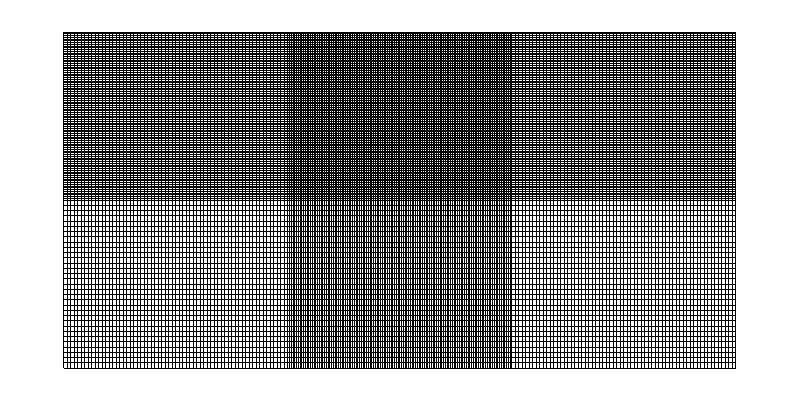

In [17]:
# gLucifer visualisation of mesh
fig = glucifer.Figure( figsize=(800,400) )
fig.append(glucifer.objects.Mesh(mesh))

fig.save_database('test.gldb')
fig.show()

In [510]:
mesh.maxCoord

(1.0, 1.0)